In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [143]:
data = fetch_california_housing()

df = pd.DataFrame(data.data, columns=data.feature_names)

df["Price"] = data.target

In [144]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [145]:
X = df.drop(columns="Price", axis=1)
y = df["Price"]

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [147]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [148]:
X_train_scaled = pd.DataFrame(X_train, columns=X.columns)

In [149]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [150]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("r2:", r2)
print("mae:", mae)
print("mse:", mse)
print("rmse:", rmse)

r2: 0.5757877060324512
mae: 0.5332001304956557
mse: 0.5558915986952437
rmse: 0.745581383012776


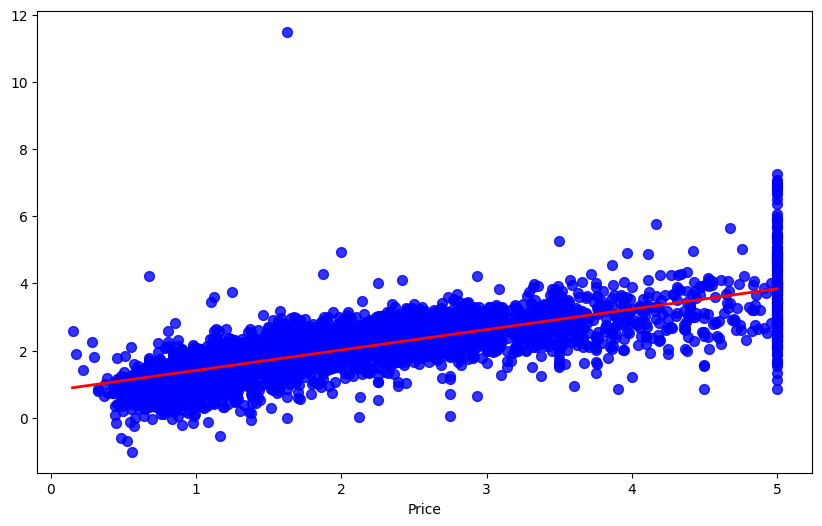

In [151]:
plt.figure(figsize=(10, 6))

sns.regplot(x=y_test, y=y_pred, ci=None, color='blue', 
            line_kws={'color': 'red', 'linewidth': 2}, 
            scatter_kws={'color': 'blue', 's': 50})   

plt.show()